In [1]:
import pandas as pd
data = pd.read_csv(r"C:\Users\Sayan Mondal\Downloads\Bitcoin Historical Data.csv")

In [2]:
df=data.copy()

In [3]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Convert numeric columns with commas to float
numeric_columns = ['Price', 'Open', 'High', 'Low']
for col in numeric_columns:
    df[col] = df[col].str.replace(',', '').astype(float)

# Remove '%' sign and convert 'Change %' column to float
df['Change %'] = df['Change %'].str.rstrip('%').astype(float)




In [4]:
# Convert 'Vol.' column to numeric (handles 'K', 'M', and 'B' suffixes)
def convert_vol(value):
    multiplier = 1
    if 'K' in value:
        multiplier = 1000
    elif 'M' in value:
        multiplier = 1000000
    elif 'B' in value:
        multiplier = 1000000000
    return float(value.replace('K', '').replace('M', '').replace('B', '')) * multiplier

df['Vol.'] = df['Vol.'].apply(convert_vol)

# Print the DataFrame with updated 'Vol.' column
print(df)


           Date    Price     Open     High      Low      Vol.  Change %
0    2024-03-23  63522.8  63785.6  64324.3  63074.9   70980.0     -0.41
1    2024-03-22  63785.5  65501.5  66633.3  62328.3   72430.0     -2.62
2    2024-03-21  65503.8  67860.0  68161.7  64616.1   75260.0     -3.46
3    2024-03-20  67854.0  62046.8  68029.5  60850.9  133530.0      9.35
4    2024-03-19  62050.0  67594.1  68099.6  61560.6  148080.0     -8.20
...         ...      ...      ...      ...      ...       ...       ...
2269 2018-01-05  16954.8  15180.1  17126.9  14832.4  141960.0     11.69
2270 2018-01-04  15180.1  15156.5  15408.7  14244.7  110970.0      0.15
2271 2018-01-03  15156.6  14754.1  15435.0  14579.7  106540.0      2.73
2272 2018-01-02  14754.1  13444.9  15306.1  12934.2  137730.0      9.74
2273 2018-01-01  13444.9  13850.5  13921.5  12877.7   78430.0     -2.93

[2274 rows x 7 columns]


In [5]:
df['Price'] = df['Price'].astype('int64')

In [6]:
df['Price']

0       63522
1       63785
2       65503
3       67854
4       62050
        ...  
2269    16954
2270    15180
2271    15156
2272    14754
2273    13444
Name: Price, Length: 2274, dtype: int64

In [7]:
# Convert numeric columns with commas to float
numeric_columns = ['Price', 'Open', 'High', 'Low']
for col in numeric_columns:
    df[col] = df[col].astype('int64')

In [8]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2024-03-23,63522,63785,64324,63074,70980.0,-0.41
1,2024-03-22,63785,65501,66633,62328,72430.0,-2.62
2,2024-03-21,65503,67860,68161,64616,75260.0,-3.46
3,2024-03-20,67854,62046,68029,60850,133530.0,9.35
4,2024-03-19,62050,67594,68099,61560,148080.0,-8.20
...,...,...,...,...,...,...,...
2269,2018-01-05,16954,15180,17126,14832,141960.0,11.69
2270,2018-01-04,15180,15156,15408,14244,110970.0,0.15
2271,2018-01-03,15156,14754,15435,14579,106540.0,2.73
2272,2018-01-02,14754,13444,15306,12934,137730.0,9.74


In [9]:
df1=df.reset_index()['Price']

In [10]:
df1


0       63522
1       63785
2       65503
3       67854
4       62050
        ...  
2269    16954
2270    15180
2271    15156
2272    14754
2273    13444
Name: Price, Length: 2274, dtype: int64

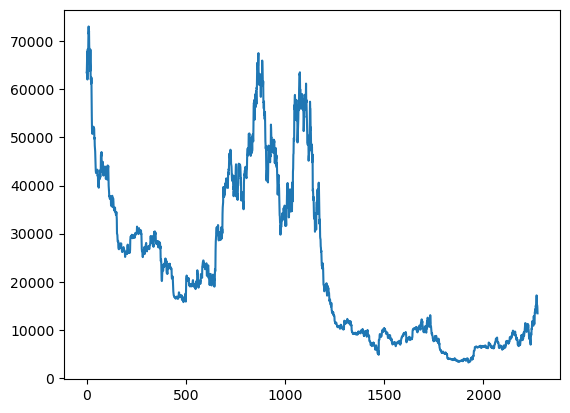

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
df1


array([[0.86334087],
       [0.86710673],
       [0.89170652],
       ...,
       [0.17079527],
       [0.16503909],
       [0.14628139]])

In [14]:

##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(1478, 796)

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
print(X_train.shape), print(y_train.shape)

(1377, 100)
(1377,)


(None, None)

In [18]:
print(X_test.shape), print(ytest.shape)

(695, 100)
(695,)


(None, None)

In [19]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [23]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
22/22 [==============================] - 20s 405ms/step - loss: 0.0256 - val_loss: 0.0056
Epoch 2/100
22/22 [==============================] - 6s 281ms/step - loss: 0.0037 - val_loss: 5.6354e-04
Epoch 3/100
22/22 [==============================] - 6s 272ms/step - loss: 0.0027 - val_loss: 2.1447e-04
Epoch 4/100
22/22 [==============================] - 5s 252ms/step - loss: 0.0025 - val_loss: 2.0442e-04
Epoch 5/100
22/22 [==============================] - 6s 259ms/step - loss: 0.0023 - val_loss: 1.9202e-04
Epoch 6/100
22/22 [==============================] - 6s 286ms/step - loss: 0.0021 - val_loss: 1.9132e-04
Epoch 7/100
22/22 [==============================] - 5s 250ms/step - loss: 0.0019 - val_loss: 1.8596e-04
Epoch 8/100
22/22 [==============================] - 6s 265ms/step - loss: 0.0018 - val_loss: 1.6384e-04
Epoch 9/100
22/22 [==============================] - 6s 263ms/step - loss: 0.0018 - val_loss: 1.7392e-04
Epoch 10/100
22/22 [==============================] - 6s 2

In [27]:
tf.__version__

'2.15.0'

In [28]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

22/22 [==============================] - 1s 64ms/step


In [29]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [30]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

33074.91248815313

In [31]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

7872.457912853775

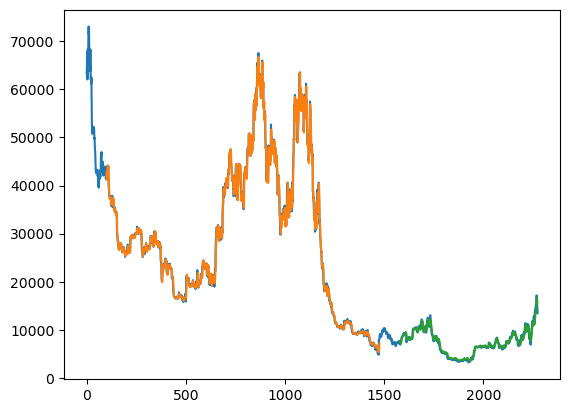

In [32]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [33]:
len(test_data)

796

In [34]:
x_input=test_data[696:].reshape(1,-1)
x_input.shape

(1, 100)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
temp_input

[0.05192015808012829,
 0.05087488186946934,
 0.05444027606747043,
 0.052650419542369487,
 0.04862682207394255,
 0.05088920072167015,
 0.05126149087889115,
 0.06008190383458861,
 0.05498439245110112,
 0.051504911366304876,
 0.053122941664996134,
 0.05190583922792749,
 0.055857842435350386,
 0.06767089550101664,
 0.06548011111429307,
 0.07037715856696927,
 0.07510237979323577,
 0.07616197485609554,
 0.08144563131819353,
 0.07872504940004009,
 0.08128812394398464,
 0.0813883559093903,
 0.07714997565795126,
 0.07120765199461611,
 0.06652538732495203,
 0.07246771098828718,
 0.07210973968326699,
 0.07133652166442338,
 0.08485351814198573,
 0.08461009765457202,
 0.09022308771728858,
 0.07924052807926917,
 0.08575560583063661,
 0.08694407056330365,
 0.09556401958818982,
 0.10663249233941406,
 0.11601134053094304,
 0.1172427618202125,
 0.11704229788940117,
 0.10880895787393681,
 0.10991150949339899,
 0.10173544488673787,
 0.10547266531114864,
 0.10104813998109911,
 0.09102494344053381,
 0.09272

In [37]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.1579631]
101
1 day input [0.05087488 0.05444028 0.05265042 0.04862682 0.0508892  0.05126149
 0.0600819  0.05498439 0.05150491 0.05312294 0.05190584 0.05585784
 0.0676709  0.06548011 0.07037716 0.07510238 0.07616197 0.08144563
 0.07872505 0.08128812 0.08138836 0.07714998 0.07120765 0.06652539
 0.07246771 0.07210974 0.07133652 0.08485352 0.0846101  0.09022309
 0.07924053 0.08575561 0.08694407 0.09556402 0.10663249 0.11601134
 0.11724276 0.1170423  0.10880896 0.10991151 0.10173544 0.10547267
 0.10104814 0.09102494 0.09272889 0.09940147 0.09469057 0.10374008
 0.11469401 0.11370601 0.10266617 0.1123314  0.09951602 0.09749706
 0.08946419 0.07604742 0.08125949 0.06948939 0.0763338  0.07833844
 0.07067785 0.06251611 0.06404823 0.05312294 0.07150835 0.08609926
 0.0811163  0.08524013 0.10076176 0.0993442  0.11477992 0.12266961
 0.11797302 0.11297574 0.11419285 0.11775824 0.10989719 0.10933876
 0.11979152 0.13789055 0.11959105 0.11479424 0.11403534 0.11646954
 0.14990406 0.14987543 0.15842378 

In [38]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [39]:
len(df1)

2274

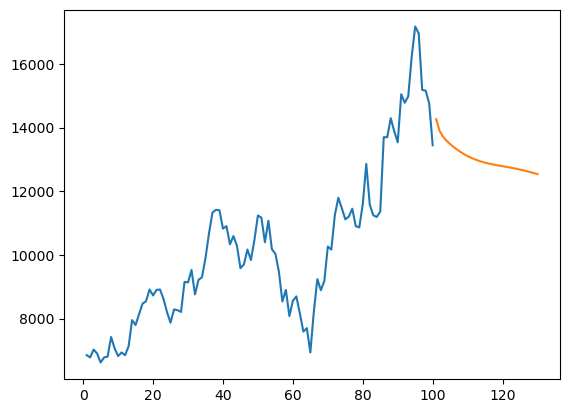

In [41]:
plt.plot(day_new,scaler.inverse_transform(df1[2174:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

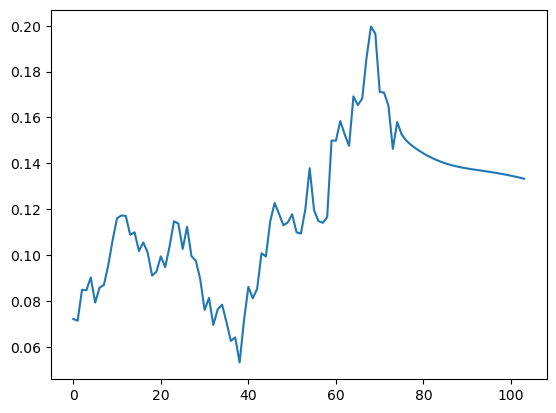

In [42]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[2200:])

In [43]:
df3=scaler.inverse_transform(df3).tolist()

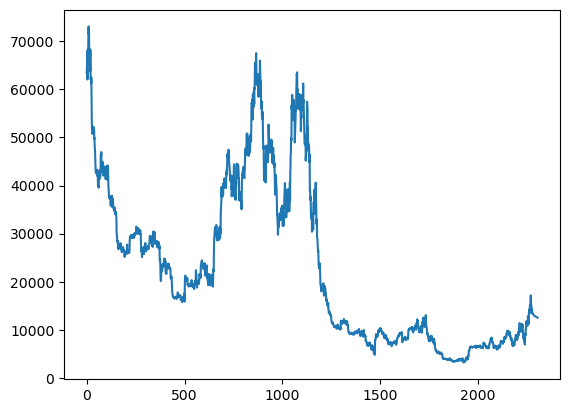

In [44]:
plt.plot(df3)